In [858]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [859]:
df = pd.read_csv("bank.csv")

In [860]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [861]:
df.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [862]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [863]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [864]:
df.shape

(11162, 17)

In [865]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [866]:
df['previous'].value_counts()

0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
13      11
17      11
14       6
15       5
19       4
16       2
20       2
27       2
23       2
40       1
41       1
28       1
18       1
58       1
55       1
26       1
21       1
22       1
30       1
29       1
37       1
Name: previous, dtype: int64

In [867]:
df.age.unique()

array([59, 56, 41, 55, 54, 42, 60, 37, 28, 38, 30, 29, 46, 31, 35, 32, 49,
       43, 26, 40, 33, 23, 48, 45, 36, 52, 53, 39, 57, 51, 44, 24, 50, 27,
       34, 47, 25, 58, 61, 68, 75, 22, 69, 66, 85, 72, 90, 67, 71, 21, 74,
       65, 62, 83, 70, 76, 77, 19, 73, 63, 20, 78, 95, 64, 79, 82, 18, 86,
       84, 87, 92, 81, 80, 93, 88, 89], dtype=int64)

In [868]:
len(df.age.unique())

76

In [869]:
df.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [870]:
len(df.job.unique())

12

In [871]:
len(df.marital.unique())

3

In [872]:
len(df.education.unique())

4

In [873]:
len(df.default.unique())

2

In [874]:
len(df.balance.unique())

3805

In [875]:
len(df.housing.unique())

2

In [876]:
len(df.contact.unique())

3

In [877]:
len(df.day.unique())

31

In [878]:
len(df.month.unique())

12

In [879]:
len(df.duration.unique())

1428

In [880]:
len(df.campaign.unique())

36

In [881]:
len(df.month.unique())

12

In [882]:
len(df.pdays.unique())

472

In [883]:
len(df.poutcome.unique())

4

In [884]:
len(df.deposit.unique())

2

In [885]:
col_drop = ['education', 'day', 'month', 'duration', 'campaign', 'month' , 'pdays'  , 'previous' ,'contact']

In [886]:
df.drop(columns = col_drop , inplace = True)

In [887]:
df

,age,job,marital,default,balance,housing,loan,poutcome,deposit
0,59,admin.,married,no,2343,yes,no,unknown,yes
1,56,admin.,married,no,45,no,no,unknown,yes
2,41,technician,married,no,1270,yes,no,unknown,yes
3,55,services,married,no,2476,yes,no,unknown,yes
4,54,admin.,married,no,184,no,no,unknown,yes
...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,no,1,yes,no,unknown,no
11158,39,services,married,no,733,no,no,unknown,no
11159,32,technician,single,no,29,no,no,unknown,no
11160,43,technician,married,no,0,no,yes,failure,no


In [888]:
df.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [889]:
df.replace({'job' :{'admin.' : 0 , 'technician' : 1 , 'services':2 ,'management' :3, 'retired':4,
       'blue-collar':5, 'unemployed':6, 'entrepreneur':7, 'housemaid':8,
       'unknown':9, 'self-employed':10, 'student':11 }}, inplace = True)

In [890]:
df.replace({'marital' :{'married' : 0 , 'single' : 1 , 'divorced':2 }}, inplace = True)

In [891]:
df.replace({'education' :{'primary' : 0 , 'secondary' : 1 , 'tertiary' :2 , 'unknown' : 3 }}, inplace = True)

In [892]:
df.replace({'default' :{'no' : 0 , 'yes' : 1 }}, inplace = True)

In [893]:
df.replace({'housing' :{'no' : 0 , 'yes' : 1 }}, inplace = True)

In [894]:
df.replace({'contact' :{'unknown' : 0 , 'telephone' : 1 , 'cellular' : 2 }}, inplace = True)

In [895]:
df.replace({'poutcome' :{'failure' : 0 , 'success' : 1, 'unknown': 3, 'other' : 4 }}, inplace = True)

In [896]:
df.replace({'deposit' :{'no' : 0 , 'yes' : 1 }}, inplace = True)

In [897]:
df.replace({'loan' :{'no' : 0 , 'yes' : 1 }}, inplace = True)

In [898]:
df

,age,job,marital,default,balance,housing,loan,poutcome,deposit
0,59,0,0,0,2343,1,0,3,1
1,56,0,0,0,45,0,0,3,1
2,41,1,0,0,1270,1,0,3,1
3,55,2,0,0,2476,1,0,3,1
4,54,0,0,0,184,0,0,3,1
...,...,...,...,...,...,...,...,...,...
11157,33,5,1,0,1,1,0,3,0
11158,39,2,0,0,733,0,0,3,0
11159,32,1,1,0,29,0,0,3,0
11160,43,1,0,0,0,0,1,0,0


In [899]:
features = ['age','job','marital','balance','loan','housing','deposit' ,'poutcome']
X = df[features]
y = df.default

In [900]:
print(X)

       age  job  marital  balance  loan  housing  deposit  poutcome
0       59    0        0     2343     0        1        1         3
1       56    0        0       45     0        0        1         3
2       41    1        0     1270     0        1        1         3
3       55    2        0     2476     0        1        1         3
4       54    0        0      184     0        0        1         3
...    ...  ...      ...      ...   ...      ...      ...       ...
11157   33    5        1        1     0        1        0         3
11158   39    2        0      733     0        0        0         3
11159   32    1        1       29     0        0        0         3
11160   43    1        0        0     1        0        0         0
11161   34    1        0        0     0        0        0         3

[11162 rows x 8 columns]


In [901]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: default, Length: 11162, dtype: int64


In [902]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 2)

In [903]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

In [904]:
st = StandardScaler()

In [905]:
st.fit(X_train, y_train)

StandardScaler()

In [906]:
knn = KNeighborsClassifier()

In [907]:
knn.fit(X_train ,y_train)

KNeighborsClassifier()

In [908]:
knn.score(X_test , y_test)

0.9810103905410247

In [909]:
from sklearn.ensemble import RandomForestClassifier

In [910]:
rf = RandomForestClassifier()

In [911]:
rf.fit(X_train , y_train)

RandomForestClassifier()

In [912]:
y_pred = rf.predict(X_test)

In [913]:
final_acc = metrics.r2_score(y_test , y_pred)

In [914]:
print(final_acc)

-0.058176762996040354


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital'>

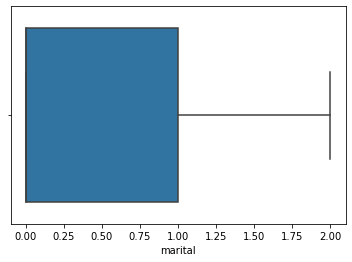

In [915]:
import seaborn as sns

sns.boxplot(df['marital'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job'>

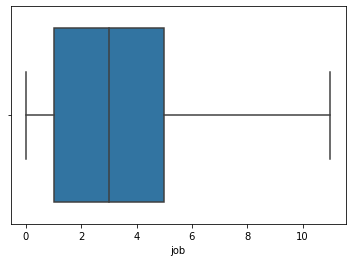

In [916]:
import seaborn as sns

sns.boxplot(df['job'])

In [917]:
from sklearn.metrics import f1_score

In [918]:
f1_score(y_test, y_pred, average = None)

array([0.99022801, 0.03571429])

In [919]:
f1_score(y_test , y_pred ,  average = 'macro')

0.5129711493718009

In [920]:
tn , fp , fn , tp = confusion_matrix(y_test , y_pred).ravel()
(tn ,fp ,fn ,tp)

(2736, 3, 51, 1)

In [921]:
prec0 = tn / (tn + fn)
prec1 = tp / (tp + fp)
print(f'Precision(0) = {prec0}, Precision(1) = {prec1}')

Precision(0) = 0.9817007534983854, Precision(1) = 0.25


In [922]:
recall0 = tn / (tn + fp)
recall1 = tp / (tp + fn)

print(f'Recall(0) = {recall0}, Recall(1) = {recall1}')

Recall(0) = 0.9989047097480832, Recall(1) = 0.019230769230769232
